<a href="https://colab.research.google.com/github/sks95/Machine-Learning-Complete/blob/main/PolynomialRegression/Polynomial%26Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
# create raw dataset
x = np.linspace(-3, 3, 100).reshape(100, 1)
y = 0.5*x**2 + x + 2 + np.random.randn(100, 1)

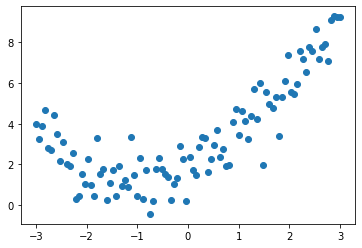

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)
y_pred = lr.predict(x)

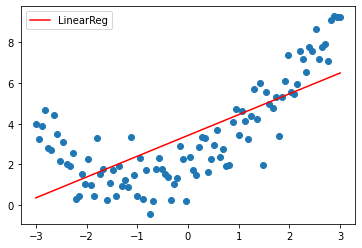

In [6]:
# plot linear regression line 
plt.scatter(x, y)
plt.plot(x, y_pred, 'r-', label='LinearReg')
plt.legend()
plt.show()

In [8]:
print('intercept: {}, coefficient: {}'.format(lr.intercept_, lr.coef_))

intercept: [3.42645651], coefficient: [[1.02298878]]


In [ ]:
# import polynomial features
